# *AIML CA2 PART B: UNSUPERVISED LEARNING*

Background : You are running a shopping mall, and you have some data about your customers like 
Age, Gender, Income and Spending.

From the background, we understand that we are to create a model which helps us clusters different types of customers.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Customer_Dataset.csv', index_col=0)

In [4]:
data.head()

,Gender,Age,Income (k$),How Much They Spend
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               200 non-null    object
 1   Age                  200 non-null    int64 
 2   Income (k$)          200 non-null    int64 
 3   How Much They Spend  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
data.isna().sum()

Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64

In [7]:
data.describe()

,Age,Income (k$),How Much They Spend
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


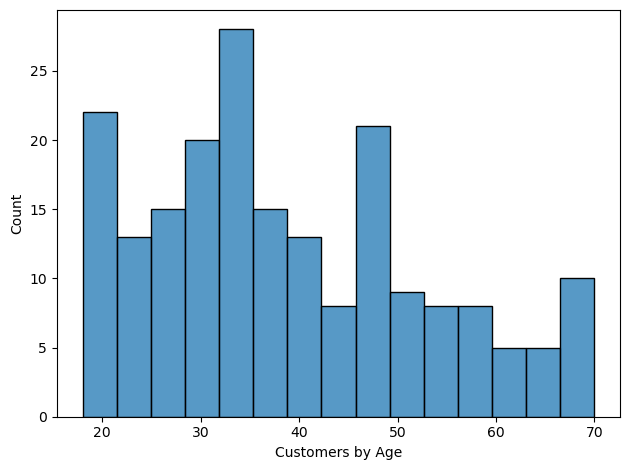

In [8]:
sns.histplot(data=data, x='Age',bins=15)
plt.xlabel('Customers by Age')

plt.tight_layout()
plt.show()


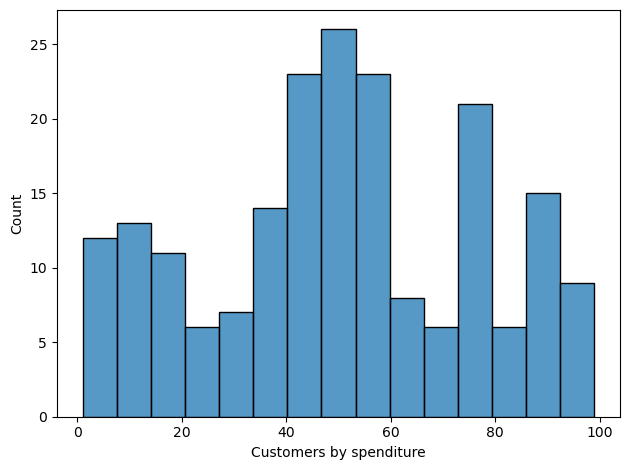

In [9]:
sns.histplot(data=data, x='How Much They Spend',bins=15)
plt.xlabel('Customers by spenditure')

plt.tight_layout()
plt.show()

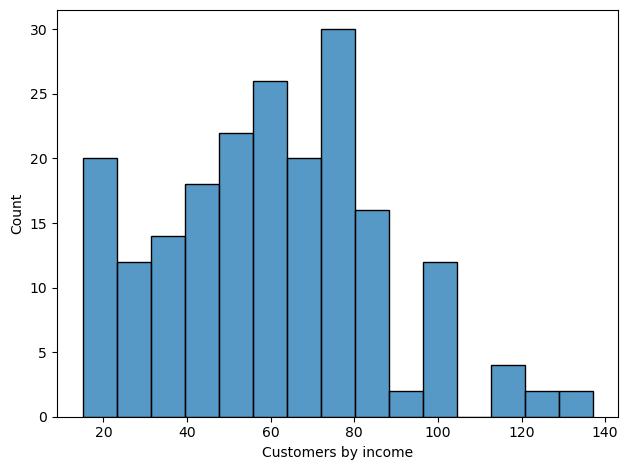

In [10]:
sns.histplot(data=data, x='Income (k$)',bins=15)
plt.xlabel('Customers by income')

plt.tight_layout()
plt.show()

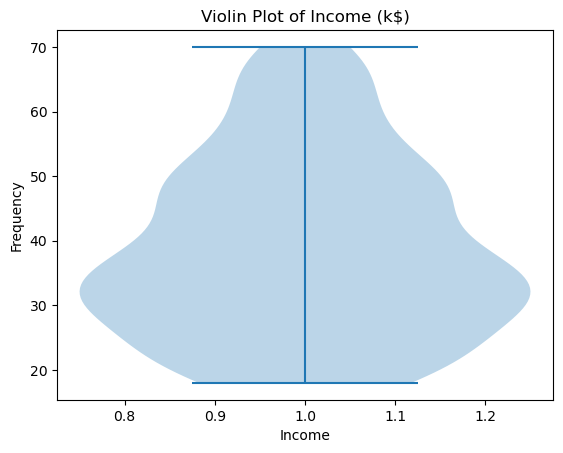

In [29]:
plt.violinplot(data['Age'])
plt.title('Violin Plot of Income (k$)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

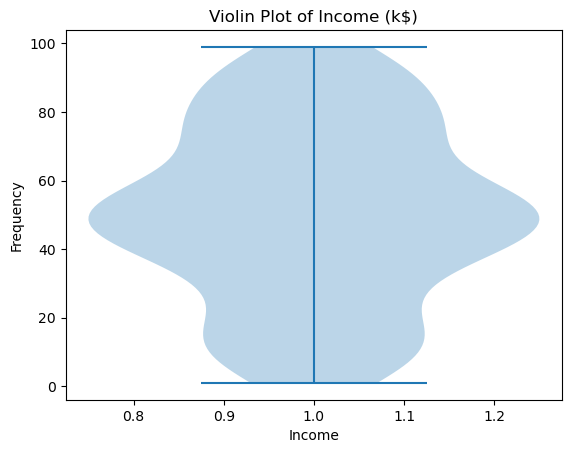

In [30]:
plt.violinplot(data['How Much They Spend'])
plt.title('Violin Plot of Income (k$)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

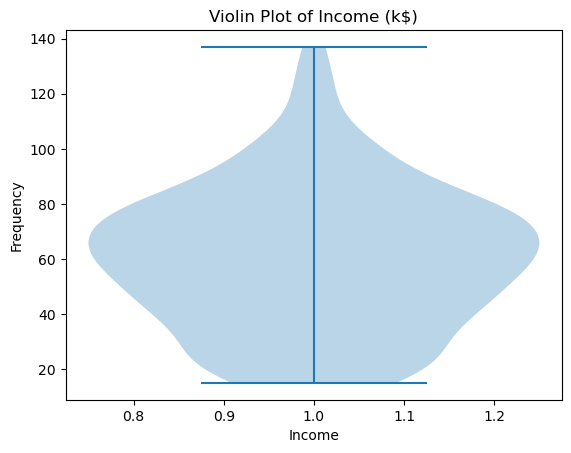

In [31]:
plt.violinplot(data['Income (k$)'])
plt.title('Violin Plot of Income (k$)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


After looking at the distribution of the different features, in order to classifiy them, i will be categorising the data based on how far apart they are to the median (Standard deviation) and putting labels ie(very high, high, average, low and very low)

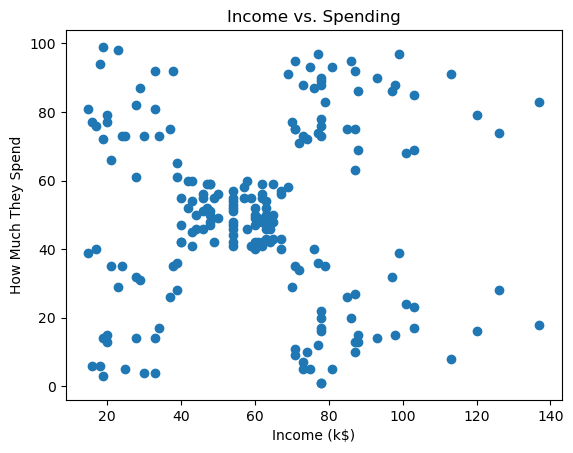

In [17]:
plt.scatter(data['Income (k$)'], data['How Much They Spend'])
plt.xlabel('Income (k$)')
plt.ylabel('How Much They Spend')
plt.title('Income vs. Spending')
plt.show()


### Chat GPT analysis


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [11]:
data = pd.read_csv('Customer_dataset.csv')


In [12]:
# Remove any missing values or outliers
data = data.dropna()

# Perform one-hot encoding
dummies = pd.get_dummies(data[["Gender"]], drop_first=True)

# Concatenate the original data with the encoded dummies
data_enc = pd.concat([data, dummies], axis=1)

# Create a subset to be dropped
to_drop = ["Gender"]

#Drop the data for feature selection
data_enc = data_enc.drop(to_drop, axis = 1)

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_enc)


In [17]:
silhouette_scores = []
k_values = range(2, 11)

# Define the clustering algorithms
kmeans = KMeans(n_clusters=k)
agg_cluster = AgglomerativeClustering(n_clusters=k)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the models and obtain the cluster labels
kmeans_labels = kmeans.fit_predict(data_enc)
agg_cluster_labels = agg_cluster.fit_predict(data_enc)
dbscan_labels = dbscan.fit_predict(data_enc)


c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
# Calculate the silhouette score for each clustering algorithm and value of k
kmeans_silhouette = silhouette_score(data_enc, kmeans_labels)
agg_cluster_silhouette = silhouette_score(data_enc, agg_cluster_labels)
dbscan_silhouette = silhouette_score(data_enc, dbscan_labels)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

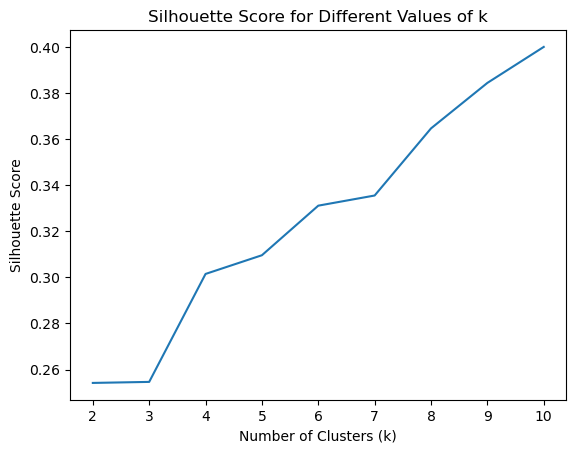

In [15]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()
